# CVSN Assignment 2

- Sampad Kumar Kar
- MCS202215

In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# we define a helper function to print the image using `matplotlib`

# this prints colored image
def print_image(img, isGray=False, title="Image"):
    # OpenCV reads images in BGR, and matplotlib reads images in RGB
    # so, we switch the color channels using `cvtColor` method
    
    # if isGray = True, we first grayscale the image using the same `cvtColor` method
    if isGray:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_colored = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    else:
        img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()


In [3]:
# helper function to extract pointer click coordinates from an image

# Define the callback function for mouse events
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Mouse clicked at:", x, y)

def extract_pointer_coordinates(img_path):
    img = cv2.imread(img_path)

    # print message
    print("Left Click on the image to exract the coordinates of the click. Press any key to exit.")

    # create window to display image
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)

    # assign the callback function to the window
    cv2.setMouseCallback("image", on_mouse)

    # display the image
    cv2.imshow("image", img)

    # press any key to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()

# 7.

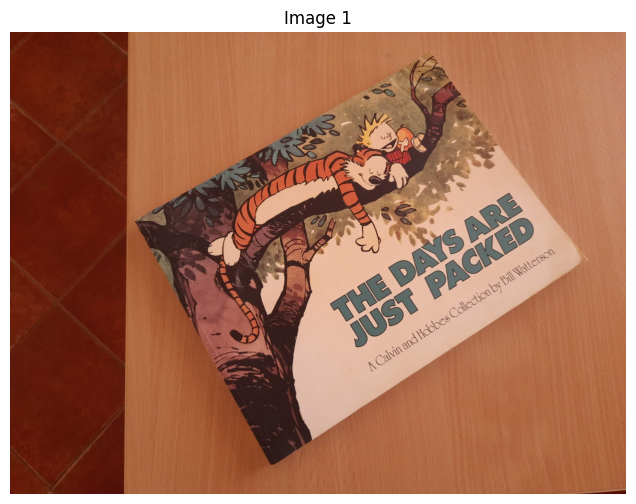

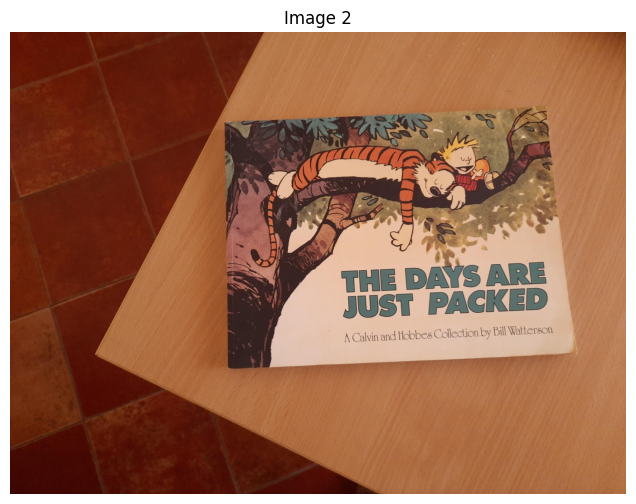

In [4]:
img1 = cv2.imread("./data/Images/CnH1.jpg")
print_image(img1, title="Image 1")
img2 = cv2.imread("./data/Images/CnH2.jpg")
print_image(img2, title="Image 2")

In [33]:
img1_path = './data/Images/CnH1.jpg'

extract_pointer_coordinates(img1_path)

In [ ]:
img2_path = './data/Images/CnH2.jpg'

extract_pointer_coordinates(img2_path)

In [ ]:
### Coordinates
# use the helper function to extarct the coordinates
'''
CnH1.jpg:
Coordinates:
(843,1204) (1735,2793) (3720,1489) (2727,121)

CnH2.jpg:
Coordinates:
(1429,582) (1457,2183) (3682,2085) (3484,476)
'''
# top-left, bottom-left, bottom-right, top-right

## 7.(a)

In [5]:
pts1 = np.array(
      [[ 843, 1204],
       [1735, 2793],
       [3720, 1489],
       [2727,  121]])

pts2 = np.array(
      [[1429,  582],
       [1457, 2183],
       [3682, 2085],
       [3484,  476]])

## 7.(b)

In [4]:
def form_Ai(p1, p2):
    x1,y1 = p1
    x2,y2 = p2

    A = np.array([
        [-x1, -y1, -1, 0, 0, 0, x1*x2, y1*x2, x2],
        [0, 0, 0, -x1, -y1, -1, x1*y2, y1*y2, y2]
    ])

    return A

def form_A(pts1, pts2):
    # transpose
    pts1, pts2 = pts1.transpose(), pts2.transpose()
    
    n = pts1.shape[1]
    
    # select the first pair of points
    p0_1 = pts1[:,0]
    p0_2 = pts2[:,0]
    
    A = form_Ai(p0_1, p0_2)

    for i in range(1,n):
        p0_1, p0_2 = pts1[:,i], pts2[:,i]
        Ai = form_Ai(p0_1, p0_2)

        A = np.vstack((A,Ai))
    
    return A

In [5]:
def H_using_DLT(pts1, pts2):
    A = form_A(pts1, pts2)

    # use SVD to decompose
    U,S,V = np.linalg.svd(A)
    
    # extract the last row and reshape into H
    H = V[-1,:].reshape((3,3))

    # normalize (3,3) entry to 1
    H  = H/H[-1,-1]

    return H

In [8]:
# finding H using my custom function
H1 = H_using_DLT(pts1, pts2)
print(H1)

[[ 7.31291737e-01 -3.78973313e-01  1.27837220e+03]
 [ 3.91597207e-01  8.15154644e-01 -7.25666102e+02]
 [-2.81993879e-05  2.53049506e-05  1.00000000e+00]]


We check the rank of the computed Homography matrix using DLT.

In [9]:
# computing rank of this matrix
rank_H = np.linalg.matrix_rank(H1)
print("Rank of H =", rank_H)

Rank of H = 3


## 7.(c)

In [10]:
# finding H using openCV `findHomography`
H2, status = cv2.findHomography(pts1, pts2)
print(H2)

[[ 7.31291737e-01 -3.78973313e-01  1.27837220e+03]
 [ 3.91597207e-01  8.15154644e-01 -7.25666102e+02]
 [-2.81993879e-05  2.53049506e-05  1.00000000e+00]]


In [11]:
# checking for equality of H1, H2 for upto 3 decimal places for the entries

is_equal = np.array_equal(np.round(H1, 3), np.round(H2, 3))

print("Is H1 == H2? \n", is_equal, sep='')

Is H1 == H2? 
True


We try Homography Transformation to transform the perspective of Image 1.

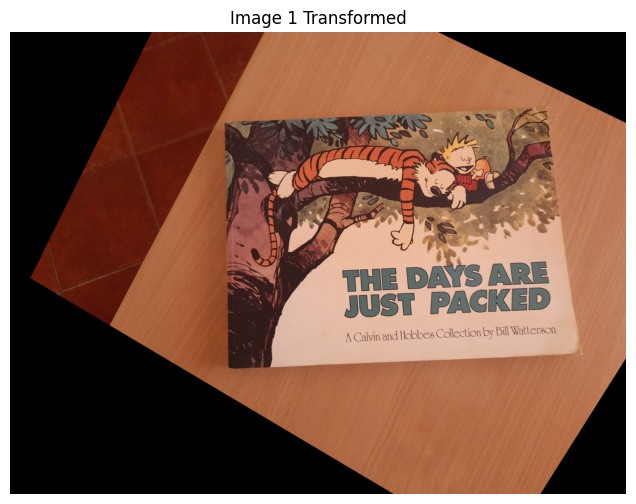

In [12]:
# homographic transformation using the Homographic matrix 'H2'

h,w,c = img1.shape

img_transformed = cv2.warpPerspective(img1, H1, (w,h))
print_image(img_transformed, title="Image 1 Transformed")

## 7.(d)

As a result of this homography, certain parts of the images have been cutoff, where as the mapped points have aligned perfectly as expected.

# 8.

In [ ]:
### Coordinates
'''
CnH1.jpg:
Coordinates:
(843,1204) (1735,2793) (3720,1489) (2727,121)

# top-left, bottom-left, bottom-right, top-right

We are maintaining the aspect ratio of the image:
w/h = 30/23
'''

In [13]:
pts = np.array([
    [ 843, 1204],
    [1735, 2793],
    [3720, 1489],
    [2727,  121]
])

In [14]:
def transform_img(img, pts_source, width=4000, aspect_ratio = (30,23), tol = 50):
    '''
    This results in a transformed image using Homographic projection (using the the mapped points) of the given width, and aspect ratio, with the given border tolerance.
    '''
    w = width
    h = int(width*(aspect_ratio[1]/aspect_ratio[0]))

    top_left = (tol, tol)
    bottom_left = (tol, h-tol)
    bottom_right = (w-tol, h-tol)
    top_right = (w-tol, tol)

    pts_dest = np.array([top_left, bottom_left, bottom_right, top_right])

    # compute Homography
    H = H_using_DLT(pts_source, pts_dest)

    # transform input image
    img_transformed = cv2.warpPerspective(img, H, (w,h))

    return img_transformed

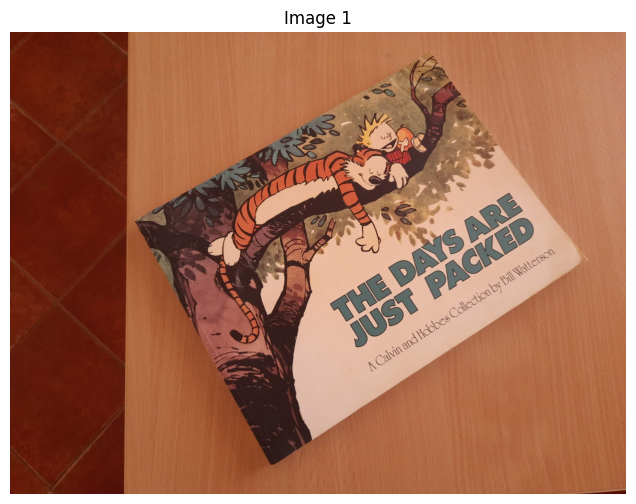

In [16]:
img1 = cv2.imread("./data/Images/CnH1.jpg")
print_image(img1, title="Image 1")

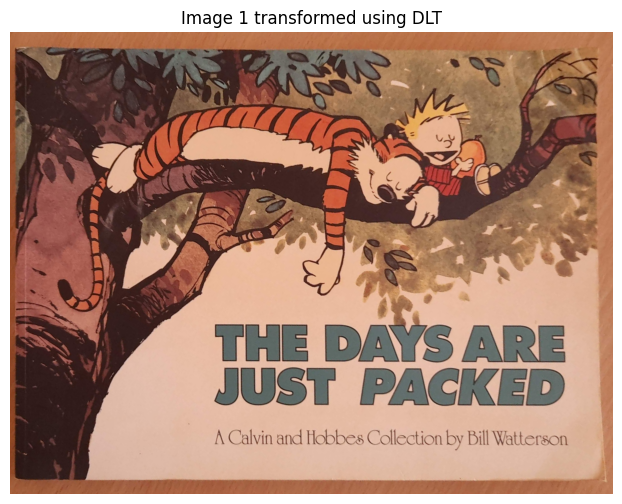

In [15]:
img1_transformed  = transform_img(img=img1, pts_source=pts, width=4000, aspect_ratio=(30,23), tol=100)
print_image(img1_transformed, title="Image 1 transformed using DLT")

Our transformed image of `Image 1` is akin to `Image 3`.

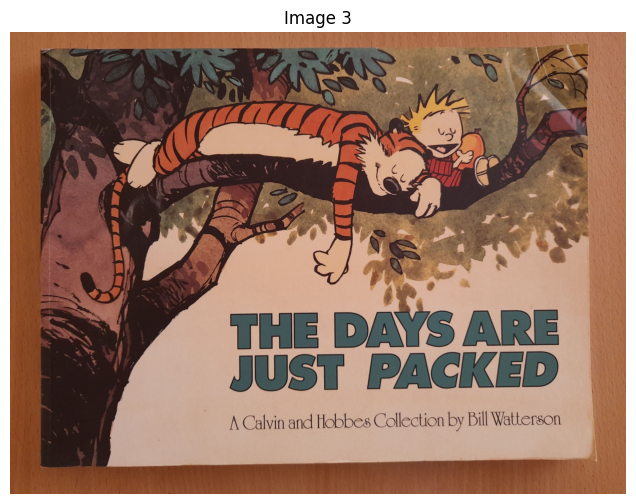

In [16]:
img3 = cv2.imread("./data/Images/CnH3.jpg")
print_image(img3, title="Image 3")

# 9.

## 9.1 Example-1: Image Switching

Replacing the image in display board with my own custom image.

In [ ]:
img_stadium_path = './data/Images/stadium_display_board.jpg'

extract_pointer_coordinates(img_stadium_path)

In [ ]:
### Coordinates
'''
stadium_display_board.jpg:
Coordinates:
(193,103), (190,300), (472,310), (476,133)

# top-left, bottom-left, bottom-right, top-right
'''

We will replace the display board with this picture of a cute cat.

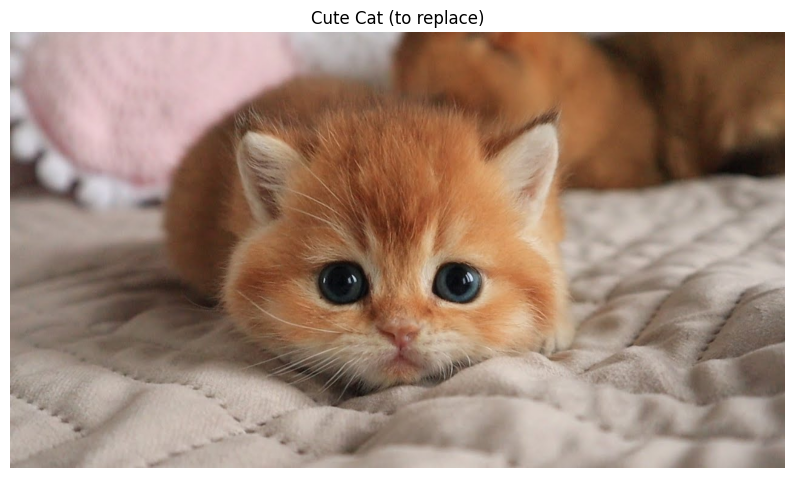

In [19]:
img_cat = cv2.imread("./data/Images/cute_kitten.jpg")
print_image(img_cat, title="Cute Cat (to replace)")

h_cat,w_cat,c = img_cat.shape

In [20]:
# (193,103), (190,300), (472,310), (476,133)
pts_db = np.array([
    [ 193,  103],
    [ 190,  300],
    [ 472,  310],
    [ 476,  133]
])

pts_cat = np.array([
    [    0,     0],
    [    0, h_cat],
    [w_cat, h_cat],
    [w_cat,     0]
])

# compute the homography
H_cat_to_bb = H_using_DLT(pts_cat, pts_db)

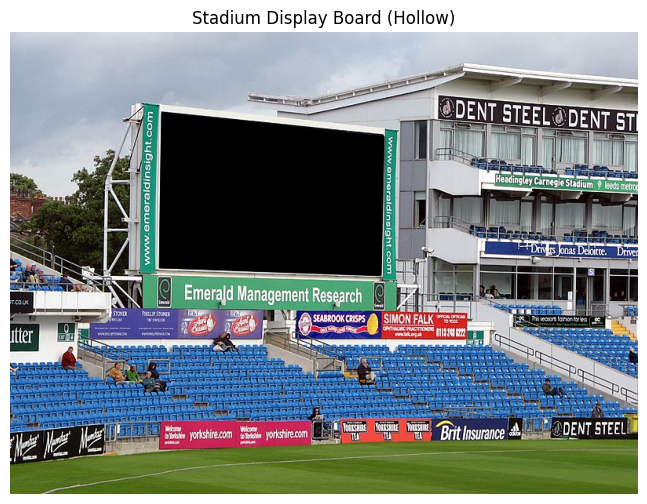

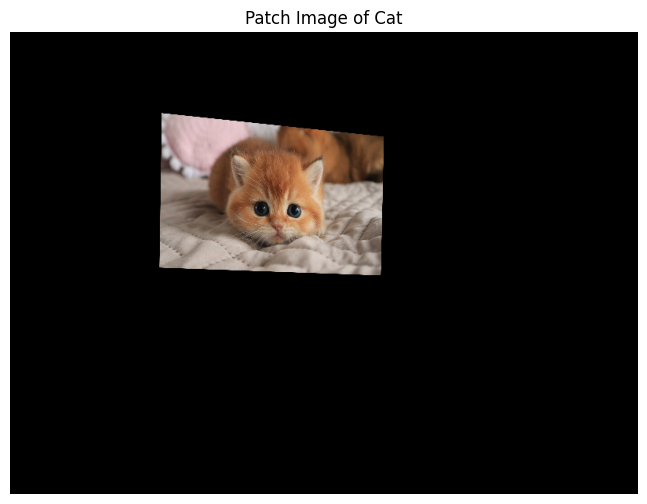

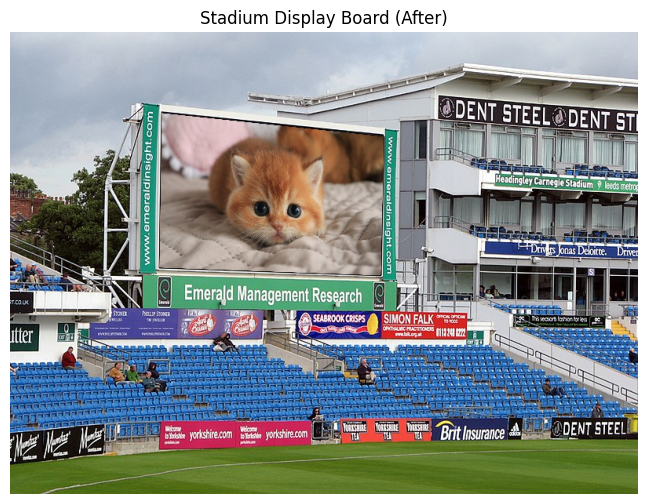

In [22]:
# Black out the displayboard section
img_stadium_new = cv2.fillConvexPoly(img=img_stadium, points=pts_db, color=0, lineType=16)

print_image(img_stadium_new, title="Stadium Display Board (Hollow)")

# get image to patch on top of the original image
img_cat_patch = cv2.warpPerspective(img_cat, H_cat_to_bb, (img_stadium.shape[1], img_stadium.shape[0]))

print_image(img_cat_patch, title="Patch Image of Cat")

# Add the patched image to hollow image
img_stadium_custom = img_stadium_new + img_cat_patch

# show image
print_image(img_stadium_custom, title="Stadium Display Board (After)")

## 9.2 Example-2: Panorama

Panorama effect by stitching images.

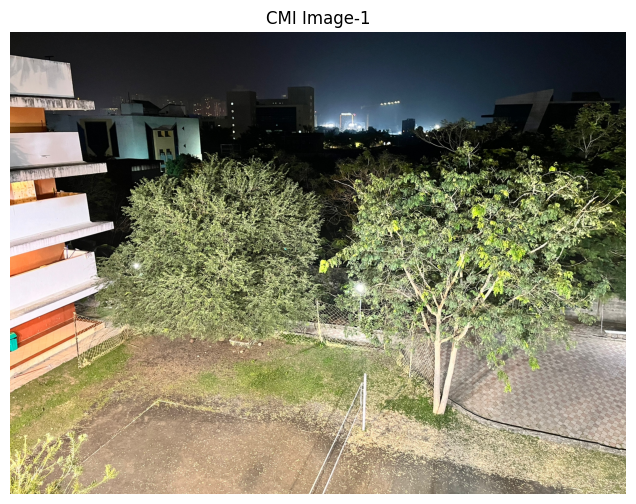

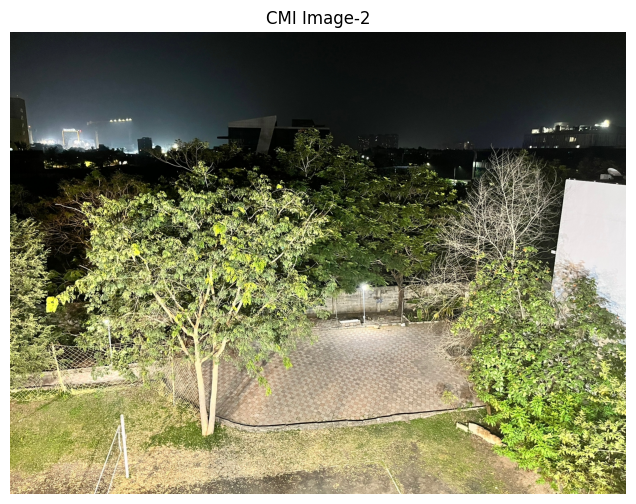

In [6]:
img_cmi1_path = './data/Images/cmi1.jpeg'
img_cmi2_path = './data/Images/cmi2.jpeg'

img_cmi1 = cv2.imread(img_cmi1_path)
img_cmi2 = cv2.imread(img_cmi2_path)

print_image(img_cmi1, title="CMI Image-1")
print_image(img_cmi2, title="CMI Image-2")

In [ ]:
extract_pointer_coordinates(img_cmi1_path)

In [ ]:
extract_pointer_coordinates(img_cmi2_path)

In [7]:
pts_cmi1 = np.array([
    [ 806, 627],
    [1108, 992],
    [1372, 876],
    [1577, 510],
    [1180, 283],
    [ 899, 386],
])

pts_cmi2 = np.array([
    [ 96, 728],
    [508,1046],
    [733, 875],
    [843, 525],
    [490, 335],
    [192, 444],
])

# convert x-> x+ 750, y-> y-85

pts_pan = np.array([
    [ 96+750, 728-85],
    [508+750,1046-85],
    [733+750, 875-85],
    [843+750, 525-85],
    [490+750, 335-85],
    [192+750, 444-85],
])

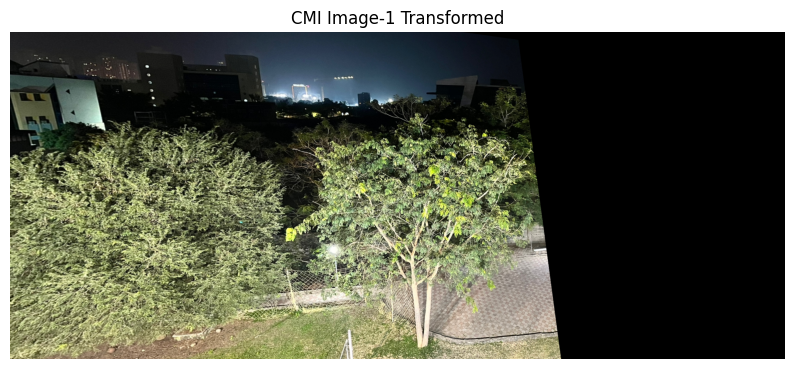

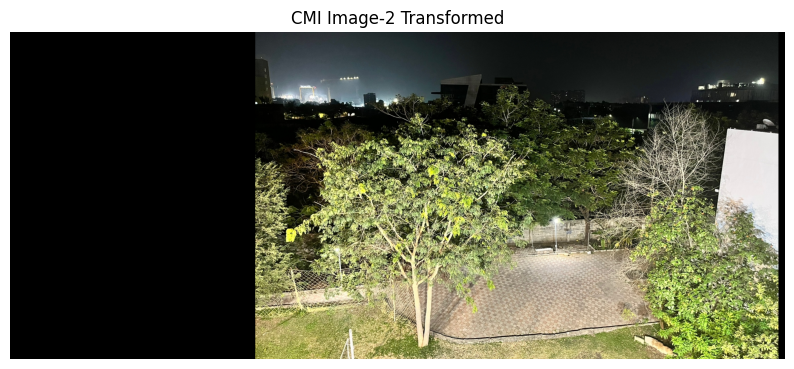

In [12]:
# shape of panorama image
h_pan = 1000
w_pan = 1600*2-830

# Compute Homography
H1 = H_using_DLT(pts_cmi1, pts_pan)
H2 = H_using_DLT(pts_cmi2, pts_pan)

img_cmi1_transformed = cv2.warpPerspective(img_cmi1, H1, (w_pan,h_pan))
img_cmi2_transformed = cv2.warpPerspective(img_cmi2, H2, (w_pan,h_pan))

print_image(img_cmi1_transformed, title="CMI Image-1 Transformed")
print_image(img_cmi2_transformed, title="CMI Image-2 Transformed")

In [10]:
img_cmi1_transformed_path = './data/Images/cmi1_transformed.jpeg'
img_cmi2_transformed_path = './data/Images/cmi2_transformed.jpeg'

cv2.imwrite('./data/Images/cmi1_transformed.jpeg', img_cmi1_transformed)
cv2.imwrite('./data/Images/cmi2_transformed.jpeg', img_cmi2_transformed)

True

Now, we align the trees and stitch them.

In [ ]:
extract_pointer_coordinates(img_cmi2_transformed_path)

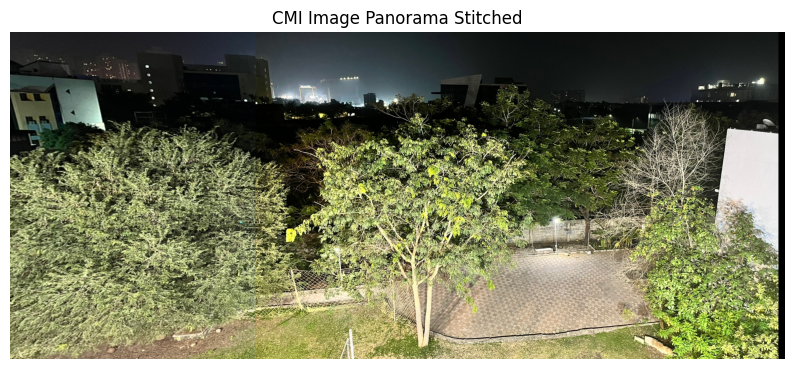

In [13]:
w_slice = 751

img_pan = np.zeros((h_pan, w_pan, 3), np.uint8)

img_pan[:, :w_slice, :] = img_cmi1_transformed[:, :w_slice, :]
img_pan[:, w_slice:, :] = img_cmi2_transformed[:, w_slice:, :]

print_image(img_pan, title="CMI Image Panorama Stitched")

In [14]:
# save this image
img_cmi_panorama_path = './data/Images/cmi_panorama.jpeg'
cv2.imwrite(img_cmi_panorama_path, img_pan)

True